In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate



In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('creditcard_2023.csv')

In [5]:
df=df.drop(['id'],axis=1)

In [6]:
df = df[["V2", "V4","V8", "V11", "V21","V27","Amount","Class"]]

In [7]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [9]:
print(f'Conjunto de treino : {X_train.shape}')
print(f'Conjunto de treino : {X_test.shape}')

Conjunto de treino : (454904, 7)
Conjunto de treino : (113726, 7)


In [10]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X_train)

y = sc_X.fit_transform(np.array(y_train).reshape(-1,1))

In [11]:
from sklearn.model_selection import GridSearchCV, KFold

In [12]:
from sklearn.metrics import make_scorer

In [13]:
splitter = KFold(n_splits = 5, shuffle = True, random_state = 42)
metrica = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score)}

param_grid={'max_depth':[None,2,5, 10],'criterion':['entropy'],'n_estimators':[100]}


LR = RandomForestClassifier()


grid_LR = GridSearchCV(estimator = LR,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           refit = 'f1',return_train_score = True)

grid_LR.fit(X_train, y_train) # aplicação do processo do GridSearch

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [None, 2, 5, 10], 'n_estimators': [100]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [14]:
grid_LR.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}

In [15]:
grid_LR.best_score_

0.9974595782431512

In [16]:
Teste_LR = pd.DataFrame(grid_LR.cv_results_)

In [17]:
Teste_LR

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
0,472.723457,14.284588,2.261337,0.138352,entropy,None,100,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.997483,0.997505,...,0.997460,0.000078,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,86.466187,0.722396,0.951154,0.061039,entropy,2,100,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.912355,0.912542,...,0.906057,0.002282,4,0.907255,0.908087,0.903230,0.904217,0.908322,0.906222,0.002094
2,185.081857,11.345431,1.166843,0.115632,entropy,5,100,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.938789,0.936932,...,0.935942,0.002011,3,0.936235,0.935354,0.936435,0.934572,0.938205,0.936160,0.001219
3,311.840335,9.704976,1.467965,0.098578,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.962970,0.962674,...,0.961776,0.000479,2,0.963165,0.963389,0.963563,0.962705,0.963390,0.963243,0.000297


In [18]:
Treino = Teste_LR[['params','mean_train_accuracy', 'std_train_accuracy',
                  'mean_train_recall', 'std_train_recall','mean_train_precision', 'std_train_precision',
                  'mean_train_f1', 'std_train_f1']]

In [19]:
Teste = Teste_LR[['params','mean_test_accuracy','std_test_accuracy','mean_test_recall','std_test_recall',
          'mean_test_precision','std_test_precision',
          'mean_test_f1','std_test_f1','mean_fit_time','std_fit_time',
 'mean_score_time',
 'std_score_time']]

In [20]:
Treino

,params,mean_train_accuracy,std_train_accuracy,mean_train_recall,std_train_recall,mean_train_precision,std_train_precision,mean_train_f1,std_train_f1
0,"{'criterion': 'entropy', 'max_depth': None, 'n...",1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.911452,0.001619,0.856197,0.005220,0.962490,0.002253,0.906222,0.002094
2,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.938491,0.001076,0.902462,0.002448,0.972479,0.001361,0.936160,0.001219
3,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.964073,0.000276,0.941961,0.000565,0.985508,0.000372,0.963243,0.000297


In [21]:
Teste

,params,mean_test_accuracy,std_test_accuracy,mean_test_recall,std_test_recall,mean_test_precision,std_test_precision,mean_test_f1,std_test_f1,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.997459,0.000079,0.998249,0.000106,0.996671,0.000108,0.997460,0.000078,472.723457,14.284588,2.261337,0.138352
1,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.911298,0.001994,0.855995,0.005592,0.962377,0.002211,0.906057,0.002282,86.466187,0.722396,0.951154,0.061039
2,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.938281,0.001940,0.902215,0.004212,0.972304,0.001514,0.935942,0.002011,185.081857,11.345431,1.166843,0.115632
3,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.962634,0.000530,0.940633,0.001287,0.983892,0.000673,0.961776,0.000479,311.840335,9.704976,1.467965,0.098578


In [22]:
Treino.to_csv('Treino2_RF')

In [23]:
Teste.to_csv('Teste2_RF')

In [24]:
y_pred= grid_LR.predict(X_test)

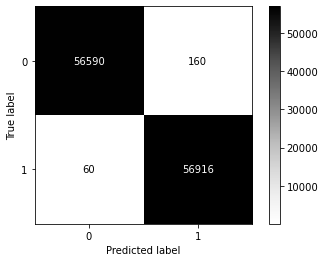

In [25]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap="Greys")

plt.show()